In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import pandas as pd
from pathlib import Path

from opera_tropo import download

In [3]:
hres_sds = download.HRESDownloader()

In [6]:
# Check the number of files in s3 bucket
hres_dates = hres_sds.list_matching_keys(start_date='20240101', end_date='20250101')

Number of Dates: 1450


In [16]:
hres_dates = pd.DataFrame(hres_dates, columns=['s3_key', 'url'])
hres_dates['dates'] = hres_dates['s3_key'].apply(lambda x: x.split('/')[0])
hres_dates['filename'] = hres_dates['s3_key'].apply(lambda x: x.split('/')[1])
hres_dates = hres_dates[['dates', 'filename', 's3_key', 'url']]
hres_dates

dates                                   filename  \
0     20240101  ECMWF_TROP_202401010000_202401010000_1.nc   
1     20240101  ECMWF_TROP_202401010600_202401010600_1.nc   
2     20240102  ECMWF_TROP_202401020000_202401020000_1.nc   
3     20240103  ECMWF_TROP_202401030000_202401030000_1.nc   
4     20240103  ECMWF_TROP_202401030600_202401030600_1.nc   
...        ...                                        ...   
1445  20241230  ECMWF_TROP_202412301800_202412301800_1.nc   
1446  20241231  ECMWF_TROP_202412310000_202412310000_1.nc   
1447  20241231  ECMWF_TROP_202412310600_202412310600_1.nc   
1448  20241231  ECMWF_TROP_202412311200_202412311200_1.nc   
1449  20241231  ECMWF_TROP_202412311800_202412311800_1.nc   

                                                 s3_key  \
0     20240101/ECMWF_TROP_202401010000_202401010000_...   
1     20240101/ECMWF_TROP_202401010600_202401010600_...   
2     20240102/ECMWF_TROP_202401020000_202401020000_...   
3     20240103/ECMWF_TROP_202401030000_202401030000_...   
4     20240103/ECMWF_TROP_202401030600_202401030600_...   
...                                                 ...   
1445  20241230/ECMWF_TROP_202412301800_202412301800_...   
1446  20241231/ECMWF_TROP_202412310000_202412310000_...   
1447  20241231/ECMWF_TROP_202412310600_202412310600_...   
1448  20241231/ECMWF_TROP_202412311200_202412311200_...   
1449  20241231/ECMWF_TROP_202412311800_202412311800_...   

                                                    url  
0     s3://opera-ecmwf/20240101/ECMWF_TROP_202401010...  
1     s3://opera-ecmwf/20240101/ECMWF_TROP_202401010...  
2     s3://opera-ecmwf/20240102/ECMWF_TROP_202401020...  
3     s3://opera-ecmwf/20240103/ECMWF_TROP_202401030...  
4     s3://opera-ecmwf/20240103/ECMWF_TROP_202401030...  
...                                                 ...  
1445  s3://opera-ecmwf/20241230/ECMWF_TROP_202412301...  
1446  s3://opera-ecmwf/20241231/ECMWF_TROP_202412310...  
1447  s3://opera-ecmwf/20241231/ECMWF_TROP_202412310...  
1448  s3://opera-ecmwf/20241231/ECMWF_TROP_202412311...  
1449  s3://opera-ecmwf/20241231/ECMWF_TROP_202412311...  

[1450 rows x 4 columns]

In [22]:
date = '20240910'
hour = '06'
filename = download._get_s3_key(date, hour)[1]
out_dir = Path('/u/aurora-r0/govorcin/01_OPERA/TROPO/final/download_test/')

hres_sds.download_hres(out_dir, date, hour)

In [23]:
import xarray as xr
# Read
ds = xr.open_dataset(out_dir / filename,
                     chunks={})
ds

<xarray.Dataset> Size: 29GB
Dimensions:    (time: 1, level: 137, latitude: 2560, longitude: 5120)
Coordinates:
  * longitude  (longitude) float32 20kB 2.501e-07 0.07031 0.1406 ... 359.9 359.9
  * latitude   (latitude) float32 10kB 89.95 89.88 89.81 ... -89.88 -89.95
  * level      (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * time       (time) datetime64[ns] 8B 2024-09-10T06:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    t          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    lnsp       (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2025-05-21 02:32:18 GMT by grib_to_netcdf-2.31.0: grib_to_n...

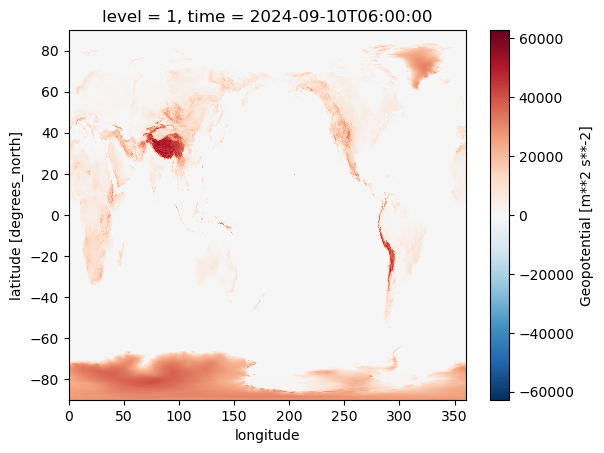

In [24]:
ds.z.isel(time=0, level=0).plot.imshow()